In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['home_captain'] = df['home_captain'].fillna('Unknown')
df['away_captain'] = df['away_captain'].fillna('Unknown')
df['Officials'] = df['Officials'].fillna('Unknown')
df['Referee'] = df['Referee'].fillna('Unknown')

In [9]:
df['Attendance'] = df['Attendance'].astype(int)


In [11]:
df = pd.read_csv('../data/matches_1930_2022.csv')
print(df.head())
print(df.info())

   home_team away_team  home_score  home_xg  home_penalty  away_score  \
0  Argentina    France           3      3.3           4.0           3   
1    Croatia   Morocco           2      0.7           NaN           1   
2     France   Morocco           2      2.0           NaN           0   
3  Argentina   Croatia           3      2.3           NaN           0   
4    Morocco  Portugal           1      1.4           NaN           0   

   away_xg  away_penalty      home_manager  home_captain  ...  \
0      2.2           2.0    Lionel Scaloni  Lionel Messi  ...   
1      1.2           NaN      Zlatko Dalić   Luka Modrić  ...   
2      0.9           NaN  Didier Deschamps   Hugo Lloris  ...   
3      0.5           NaN    Lionel Scaloni  Lionel Messi  ...   
4      0.9           NaN   Hoalid Regragui  Romain Saïss  ...   

  home_penalty_shootout_miss_long  \
0                             NaN   
1                             NaN   
2                             NaN   
3                     

In [86]:
continent_mapping = {
    # Europe
    'France': 'Europe', 'Germany': 'Europe', 'England': 'Europe', 'Spain': 'Europe',
    'Italy': 'Europe', 'Croatia': 'Europe', 'Belgium': 'Europe',
    
    # South America
    'Argentina': 'South America', 'Brazil': 'South America', 'Uruguay': 'South America',
    'Chile': 'South America', 'Colombia': 'South America',
    
    # Asia
    'Japan': 'Asia', 'South Korea': 'Asia', 'Saudi Arabia': 'Asia', 'Iran': 'Asia',
    'Australia': 'Asia',
    
    # Africa
    'Nigeria': 'Africa', 'Morocco': 'Africa', 'Egypt': 'Africa', 'Cameroon': 'Africa',
    'Senegal': 'Africa',
    
    # North America
    'Mexico': 'North America', 'USA': 'North America', 'Canada': 'North America',
    
    # Add more as needed
}

df['home_continent'] = df['home_team'].map(continent_mapping).fillna('Other')
df['away_continent'] = df['away_team'].map(continent_mapping).fillna('Other')


In [17]:
# The teams with the most wins throughout history are identified
df['winner'] = df.apply(lambda x: x['home_team'] if x['home_score'] > x['away_score']
                        else (x['away_team'] if x['away_score'] > x['home_score'] else 'Draw'), axis=1)
winners = df[df['winner'] != 'Draw']['winner'].value_counts()
print(winners.head(15))


winner
Brazil          76
Argentina       47
Italy           45
France          39
Germany         37
England         32
Spain           31
West Germany    31
Netherlands     30
Uruguay         25
Belgium         21
Sweden          19
Poland          17
Portugal        17
Mexico          17
Name: count, dtype: int64


In [19]:
# The total number of goals for each team is calculated
goals_home = df.groupby('home_team')['home_score'].sum()
goals_away = df.groupby('away_team')['away_score'].sum()
total_goals = (goals_home + goals_away).sort_values(ascending=False)
print(total_goals.head(15))

Brazil          237.0
Argentina       152.0
France          136.0
Italy           128.0
Germany         126.0
Spain           108.0
West Germany    106.0
England         104.0
Netherlands      96.0
Uruguay          89.0
Hungary          87.0
Sweden           80.0
Belgium          69.0
Mexico           62.0
Portugal         61.0
dtype: float64


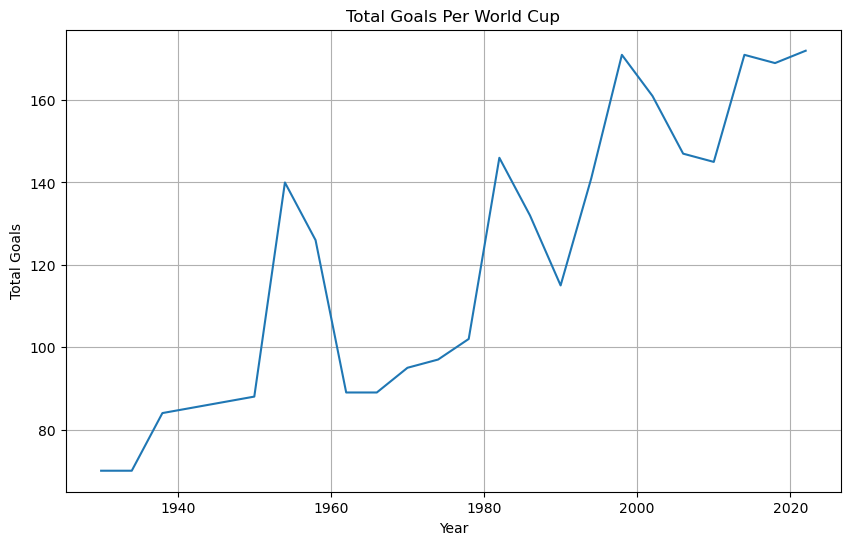

In [21]:
# The total number of goals in each World Cup is calculated
df.groupby('Year')[['home_score', 'away_score']].sum().sum(axis=1).plot(kind='line', figsize=(10,6))
plt.title('Total Goals Per World Cup')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()

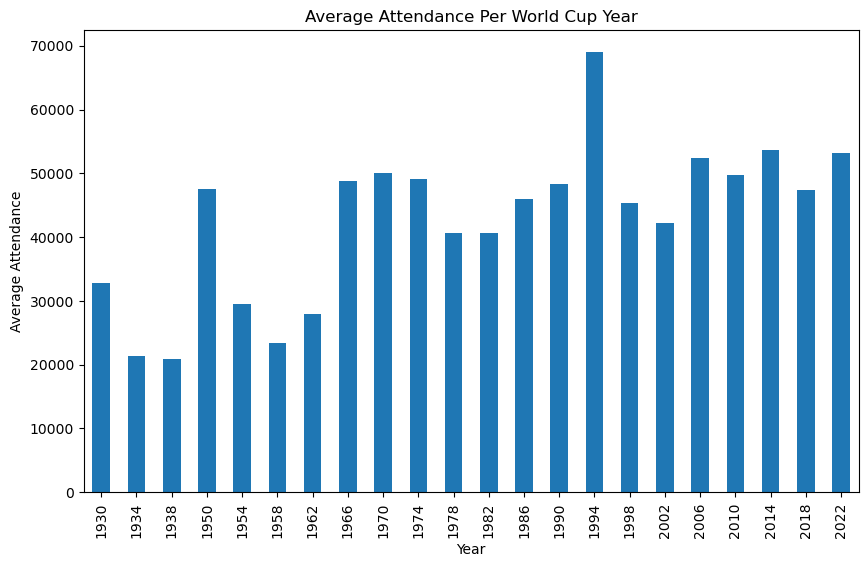

In [23]:
# The evolution of average attendance is analyzed
df.groupby('Year')['Attendance'].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Attendance Per World Cup Year')
plt.ylabel('Average Attendance')
plt.show()

In [25]:
# The number of matches in which red cards were given is calculated
num_red_card_matches = df[(df['home_red_card'].notnull()) | (df['away_red_card'].notnull())].shape[0]
print(f"Number of matches with red cards: {num_red_card_matches}")

Number of matches with red cards: 95


team
Uruguay           8
Brazil            7
Italy             6
Argentina         5
Cameroon          5
France            5
Czechoslovakia    4
Hungary           4
Mexico            4
Netherlands       3
dtype: int64


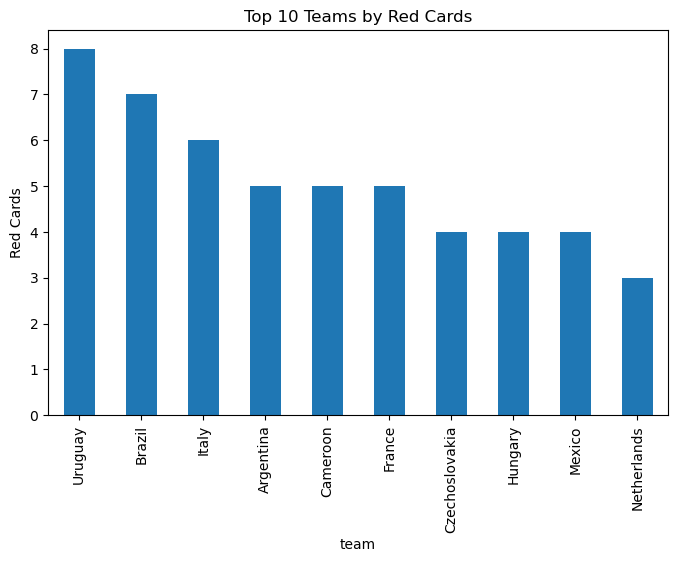

In [116]:
# The teams with the most red cards are identified by counting occurrences for each team
red_cards = pd.concat([df[['home_team', 'home_red_card']].rename(columns={'home_team':'team', 'home_red_card':'red_card'}),
                       df[['away_team', 'away_red_card']].rename(columns={'away_team':'team', 'away_red_card':'red_card'})])

red_cards_count = red_cards.dropna().groupby('team').size().sort_values(ascending=False).head(10)
print(red_cards_count)

red_cards_count.plot(kind='bar', figsize=(8,5), title='Top 10 Teams by Red Cards')
plt.ylabel('Red Cards')
plt.show()


In [49]:
# The number of matches that included yellow cards is calculated
yellow_matches = df[(df['home_yellow_card_long'].notnull()) | (df['away_yellow_card_long'].notnull())]
print(f"Number of matches with yellow cards: {yellow_matches.shape[0]}")

Number of matches with yellow cards: 725


In [118]:
# The number of matches decided by penalty shootouts is calculated
penalty_shootouts = df[df['home_penalty_shootout_goal_long'].notnull()]
print(f"Number of penalty shootout matches: {penalty_shootouts.shape[0]}")

Number of penalty shootout matches: 34


In [31]:
# The teams with the most appearances in the final are identified
finals = df[df['Round'].str.contains('Final', case=False, na=False)]
final_teams = pd.concat([finals['home_team'], finals['away_team']])
print(final_teams.value_counts().head(20))

Brazil            32
Italy             21
Argentina         19
France            19
West Germany      17
Germany           17
England           14
Uruguay           13
Sweden            12
Netherlands       11
Spain             11
Hungary            9
Czechoslovakia     9
Croatia            7
Yugoslavia         6
Portugal           5
Belgium            5
Soviet Union       5
Austria            4
Switzerland        3
Name: count, dtype: int64


In [35]:
# The average number of goals per match for each team is calculated to identify the teams that score the most per match
goals = df.groupby('home_team')['home_score'].mean().add(
    df.groupby('away_team')['away_score'].mean(), fill_value=0)
print(goals.sort_values(ascending=False).head(20))

Türkiye                   6.250000
Hungary                   5.055556
Germany                   4.462500
Brazil                    3.878702
Russia                    3.791667
France                    3.684962
West Germany              3.637427
Czechoslovakia            3.550000
Netherlands               3.500000
Bosnia and Herzegovina    3.500000
Yugoslavia                3.386029
Spain                     3.218360
Soviet Union              3.158120
Portugal                  3.142857
Argentina                 3.119813
Austria                   3.117647
Sweden                    3.023810
Côte d'Ivoire             3.000000
Czech Republic            3.000000
Romania                   2.916667
dtype: float64


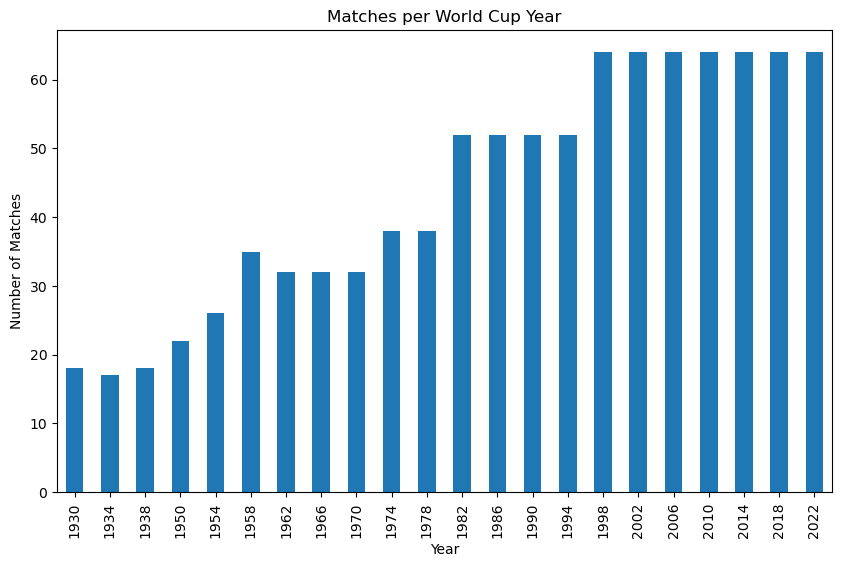

In [39]:
# The number of matches played in each World Cup edition is analyzed
matches_per_year = df['Year'].value_counts().sort_index()
matches_per_year.plot(kind='bar', figsize=(10,6), title='Matches per World Cup Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

In [45]:
# The total points (3 for a win, 1 for a draw) for the host country are calculated across the 22 World Cup editions
df['points_home'] = df.apply(lambda x: 3 if x['home_score'] > x['away_score']
                             else (1 if x['home_score'] == x['away_score'] else 0), axis=1)
host_points = df.groupby('Host')['points_home'].sum().sort_values(ascending=False)
print(host_points.head(22))

Host
Germany                  166
Mexico                   163
Brazil                   157
France                   151
Italy                    142
Qatar                    102
Korea Republic, Japan     97
Argentina                 96
Spain                     95
Russia                    91
United States             89
England                   86
Chile                     86
South Africa              85
Sweden                    82
Switzerland               68
Uruguay                   54
Name: points_home, dtype: int64


In [61]:
# The countries that have been awarded the most penalties are identified
penalties = df.groupby('home_team')['home_penalty'].sum().add(
    df.groupby('away_team')['away_penalty'].sum(), fill_value=0).sort_values(ascending=False)
print(penalties.head(20))

Argentina              25.0
France                 17.0
Brazil                 15.0
Croatia                14.0
West Germany           13.0
Italy                  13.0
Spain                  13.0
England                11.0
Netherlands            11.0
Costa Rica              8.0
Romania                 8.0
Republic of Ireland     7.0
Russia                  7.0
Korea Republic          5.0
Sweden                  5.0
Paraguay                5.0
Belgium                 5.0
Uruguay                 4.0
Japan                   4.0
Germany                 4.0
dtype: float64


In [63]:
# The average attendance per match by host country is calculated
attendance_by_host = df.groupby('Host')['Attendance'].mean().sort_values(ascending=False)
print(attendance_by_host)


Host
United States            68991.115385
Qatar                    53191.437500
Brazil                   52036.267442
Germany                  51160.372549
South Africa             49669.625000
England                  48847.968750
Mexico                   47595.309524
Russia                   47371.375000
Korea Republic, Japan    42270.890625
Italy                    41727.753623
Argentina                40678.710526
Spain                    40571.596154
France                   39989.963415
Uruguay                  32808.277778
Switzerland              29561.807692
Chile                    27911.625000
Sweden                   23423.142857
Name: Attendance, dtype: float64


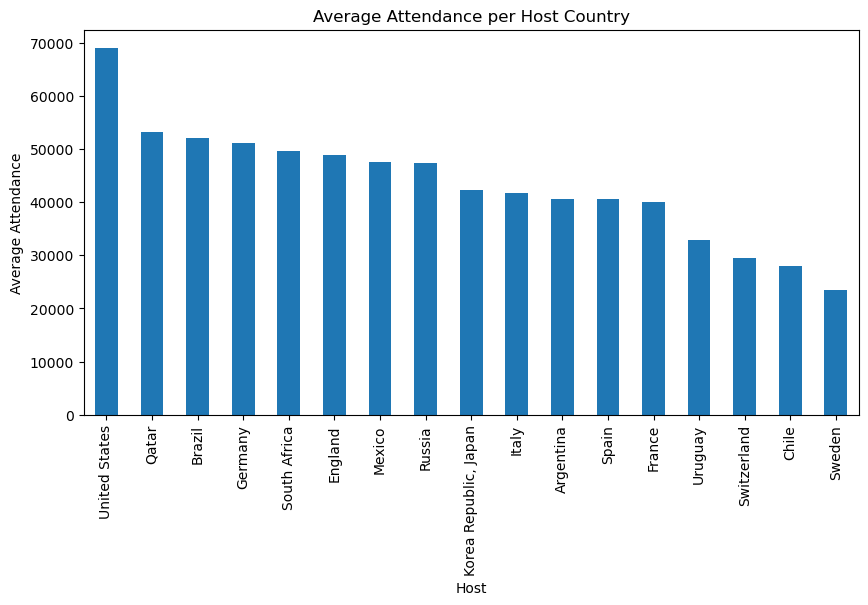

In [59]:
attendance_by_host.plot(kind='bar', figsize=(10, 5), title='Average Attendance per Host Country')
plt.ylabel('Average Attendance')
plt.show()

In [69]:
# The number of matches officiated by each referee is counted, and the referees with the most matches are identified
referee_counts = df['Referee'].value_counts().head(20)
print(referee_counts)

Referee
Néstor Pitana                9
Joel Quiniou                 8
Juan Gardeazabal             7
Benjamin Griffiths           7
Björn Kuipers                7
Jean Langenus                7
Nikolaj Latychev             6
Jamal Al Sharif              6
Alireza Faghani              6
César Arturo Ramos           6
Sandro Ricci                 6
Mark Geiger                  6
Ravshan Irmatov              6
Cüneyt Çakιr                 6
Ivan Eklind                  6
Arthur Ellis                 6
Michel Vautrot               5
Kurt Roethlisberger          5
Istvan Zsolt                 5
Arturo Yamasaki Maldonado    5
Name: count, dtype: int64


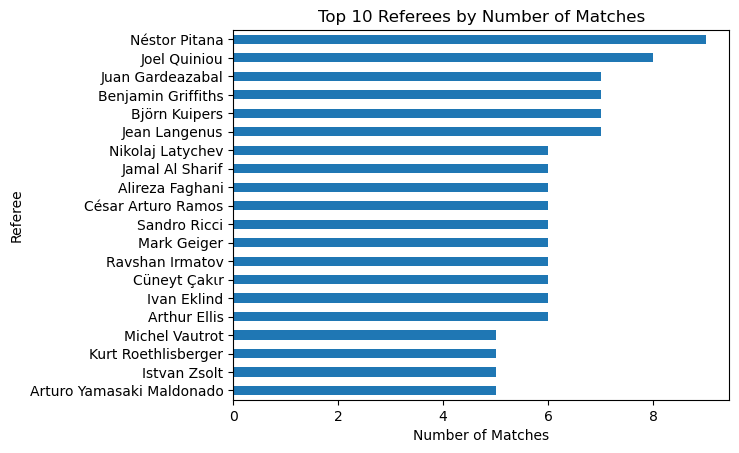

In [71]:
referee_counts.plot(kind='barh', title='Top 10 Referees by Number of Matches')
plt.xlabel('Number of Matches')
plt.gca().invert_yaxis()
plt.show()


In [80]:
# The matches that included penalty shootouts are extracted based on the penalty shootout columns
shootouts = df[df['home_penalty_shootout_goal_long'].notnull() | df['away_penalty_shootout_goal_long'].notnull()]

print(f"Number of matches decided by penalty shootout: {len(shootouts)}")
print(f"Percentage of matches decided by shootout: {100 * len(shootouts) / len(df):.2f}%")


Number of matches decided by penalty shootout: 35
Percentage of matches decided by shootout: 3.63%


winner
Helmut Schoen              16
Didier Deschamps           14
Luiz Felipe Scolari        14
Joachim Löw                12
Carlos Alberto Parreira    10
Óscar Tabárez               9
Mario Zagallo               9
Enzo Bearzot                9
Sepp Herberger              9
Tele Santana                8
Name: count, dtype: int64


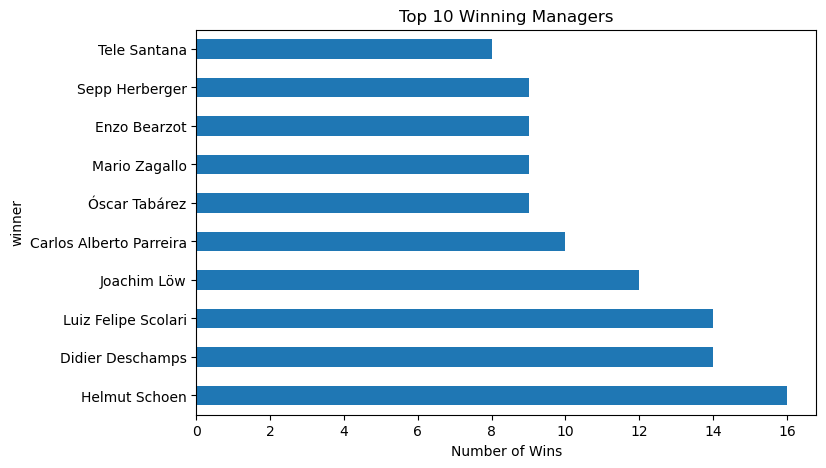

In [108]:
# The managers with the most wins are identified based on which team scored the most goals in each match
df['winner'] = df.apply(lambda row: row['home_manager'] if row['home_score'] > row['away_score'] 
                        else (row['away_manager'] if row['away_score'] > row['home_score'] else None), axis=1)
top_managers = df['winner'].value_counts().head(10)
print(top_managers)

top_managers.plot(kind='barh', figsize=(8,5), title='Top 10 Winning Managers')
plt.xlabel('Number of Wins')
plt.show()


In [112]:
# The number of matches that went to extra time is calculated
extra_time_matches = df[df['Notes'].fillna('').str.contains('Extra time|ET', case=False)]
print(f"Number of extra time matches: {len(extra_time_matches)}")


Number of extra time matches: 73


                      home_score  away_score
Round                                       
Final stage             3.833333    1.333333
Group stage play-off    3.200000    1.000000
Third-place match       2.350000    1.450000
Final                   2.333333    1.476190
Semi-finals             2.184211    1.289474
Round of 16             2.041237    1.082474
First group stage       1.972222    0.805556
Second round            1.875000    0.833333
Quarter-finals          1.728571    1.071429
First round             1.645833    0.916667
Group stage             1.642249    1.022147
Second group stage      1.416667    1.000000


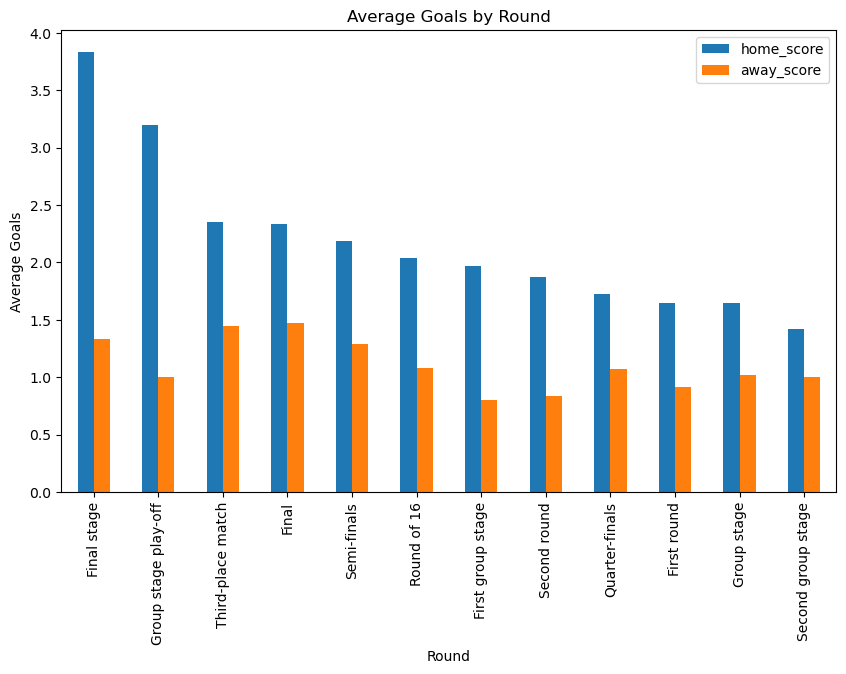

In [122]:
# The average goals in different stages of the tournament are compared
stage_goals = df.groupby('Round')[['home_score', 'away_score']].mean().sort_values(by=['home_score', 'away_score'], ascending=False)
print(stage_goals)

stage_goals.plot(kind='bar', figsize=(10,6), title='Average Goals by Round')
plt.ylabel('Average Goals')
plt.show()


In [124]:
# The difference between expected goals (XG) and actual results is analyzed
df['home_xg_diff'] = df['home_score'] - df['home_xg']
df['away_xg_diff'] = df['away_score'] - df['away_xg']

xg_diff = pd.concat([
    df.groupby('home_team')['home_xg_diff'].mean().rename('xg_diff'),
    df.groupby('away_team')['away_xg_diff'].mean().rename('xg_diff')
]).groupby(level=0).mean().sort_values()

print(xg_diff.head(10))  # The teams that scored fewer goals than expected are identified
print(xg_diff.tail(10))  # The teams that scored more goals than expected are displayed


Germany   -1.266667
Iceland   -0.875000
Brazil    -0.873810
Mexico    -0.675000
Canada    -0.650000
Wales     -0.550000
Peru      -0.500000
Poland    -0.433333
Uruguay   -0.303333
Denmark   -0.245833
Name: xg_diff, dtype: float64
South Africa           NaN
Soviet Union           NaN
Togo                   NaN
Trinidad and Tobago    NaN
Türkiye                NaN
Ukraine                NaN
United Arab Emirates   NaN
West Germany           NaN
Yugoslavia             NaN
Zaire                  NaN
Name: xg_diff, dtype: float64


Venue
Estadio Azteca, Mexico City                                         19
Jalisco, Guadalajara                                                14
Nou Camp - Estadio Leï¿½n, Leon                                     11
Lusail Iconic Stadium, Lusail                                       10
Nacional, Santiago De Chile                                         10
Estadio Centenario, Montevideo                                      10
Wembley Stadium, London                                              9
Parc des Princes, Paris                                              9
El Monumental - Estadio Monumental Antonio Vespuci, Buenos Aires     9
Al Bayt Stadium, Al Khor                                             9
Name: count, dtype: int64


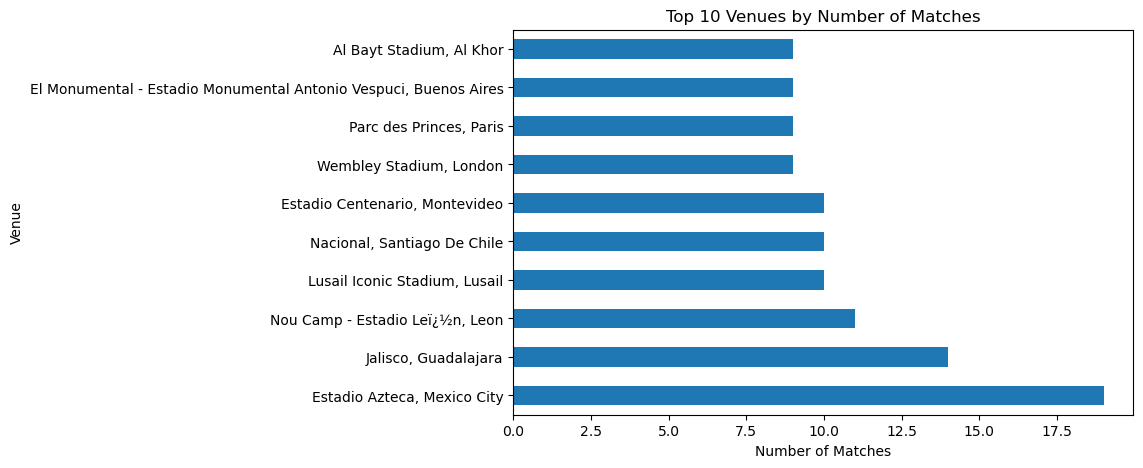

In [126]:
# The venues that have hosted the most matches are identified
top_stadiums = df['Venue'].value_counts().head(10)
print(top_stadiums)

top_stadiums.plot(kind='barh', figsize=(8,5), title='Top 10 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.show()


        home_score  away_score
Decade                        
1930      3.169811    1.056604
1950      3.156627    1.108434
1960      2.156250    0.625000
1970      1.870370    0.851852
1980      1.644231    1.028846
1990      1.476190    1.065476
2000      1.367188    1.039062
2010      1.291667    1.234375
2020      1.578125    1.109375


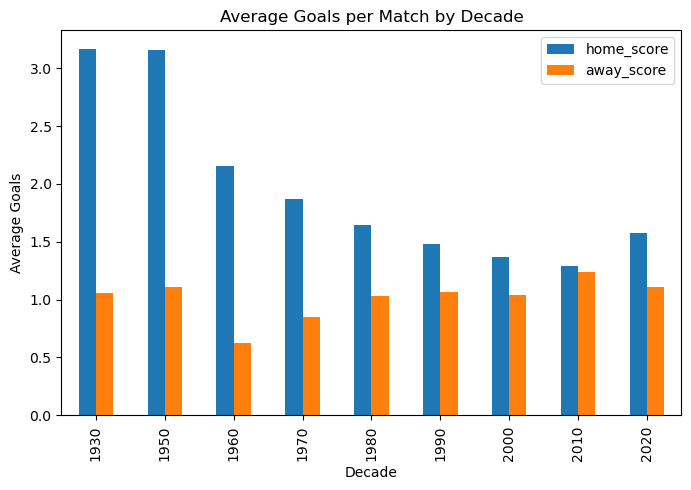

In [128]:
# The matches are analyzed across different decades
df['Decade'] = (df['Year'] // 10) * 10
decade_goals = df.groupby('Decade')[['home_score', 'away_score']].mean()
print(decade_goals)

decade_goals.plot(kind='bar', figsize=(8,5), title='Average Goals per Match by Decade')
plt.ylabel('Average Goals')
plt.show()


In [130]:
# The performance between the continents of the teams is compared
continent_results = df.groupby(['home_continent'])[['home_score', 'away_score']].mean()

print(continent_results)


                home_score  away_score
home_continent                        
Africa            1.000000    1.513514
Asia              0.838710    1.580645
Europe            1.909091    0.880165
North America     1.150000    0.850000
Other             1.726437    1.140230
South America     2.080402    0.884422


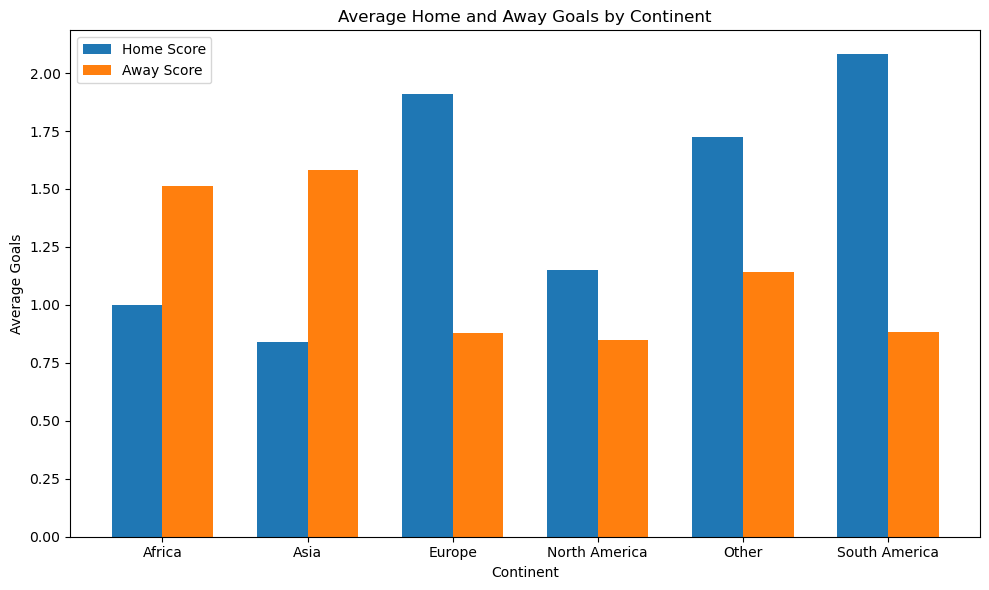

In [132]:
# The performance between the continents of the teams is compared
continent_results_reset = continent_results.reset_index()
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(continent_results_reset))

plt.bar(index, continent_results_reset['home_score'], bar_width, label='Home Score')
plt.bar([i + bar_width for i in index], continent_results_reset['away_score'], bar_width, label='Away Score')

plt.xlabel('Continent')
plt.ylabel('Average Goals')
plt.title('Average Home and Away Goals by Continent')
plt.xticks([i + bar_width/2 for i in index], continent_results_reset['home_continent'])
plt.legend()

plt.tight_layout()
plt.show()